In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('bigmart.csv.xlsx')

In [3]:
df.shape

(8523, 12)

In [4]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
# Getting the total missing values in a column

df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [6]:
# Filling the missing values with mean and mode

df['Outlet_Size'] = df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0])
df['Item_Weight'] = df['Item_Weight'].fillna(df['Item_Weight'].mean())

In [7]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

c:\users\kiit\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\kiit\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\kiit\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will resul

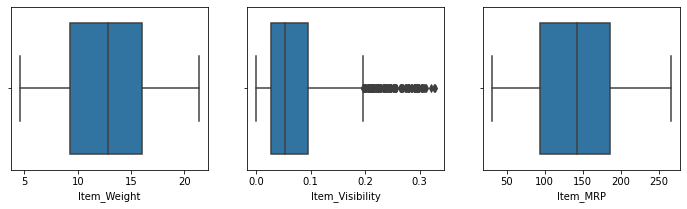

In [8]:
# Plotting the graphs to find the outliers

plt.rcParams['figure.figsize'] = (12, 3)

plt.subplot(1, 3, 1)
sns.boxplot(df['Item_Weight'])

plt.subplot(1, 3, 2)
sns.boxplot(df['Item_Visibility'])

plt.subplot(1, 3, 3)
sns.boxplot(df['Item_MRP'])

plt.show()

In [9]:
df['Item_Visibility']

0       0.016047
1       0.019278
2       0.016760
3       0.000000
4       0.000000
          ...   
8518    0.056783
8519    0.046982
8520    0.035186
8521    0.145221
8522    0.044878
Name: Item_Visibility, Length: 8523, dtype: float64

In [10]:
# Capping the outliers in 'Item_Visibility'

df = df[df['Item_Visibility'] <= 0.2]

c:\users\kiit\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_Visibility'>

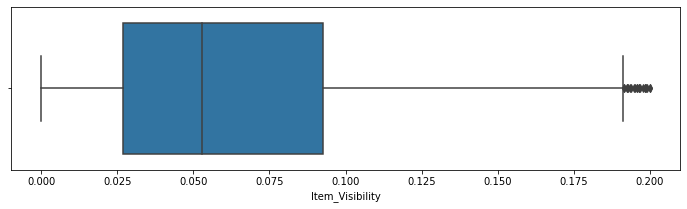

In [11]:
sns.boxplot(df['Item_Visibility'])

In [12]:
df['Item_Identifier'].value_counts()

FDW13    10
FDU12     9
NCY18     9
FDO19     9
FDW49     9
         ..
DRE01     1
FDC23     1
FDO33     1
DRF48     1
FDK57     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [14]:
# Counting how many times the first two letters of 'Item_Identifier' is repeating

df['Item_Identifier'] = df['Item_Identifier'].apply(lambda x: x[:2])
df['Item_Identifier'].value_counts()

FD    6016
NC    1583
DR     790
Name: Item_Identifier, dtype: int64

In [15]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [16]:
# Checking the column 'Item_Fat_Content'

df['Item_Fat_Content'].value_counts()

Low Fat    5024
Regular    2832
LF          307
reg         117
low fat     109
Name: Item_Fat_Content, dtype: int64

In [18]:
# We found different name for same column, hence combined all the columns of same category using replace()

df['Item_Identifier'] = df['Item_Fat_Content'].replace(('low fat', 'LF', 'reg'), ('Low Fat', 'Low Fat', 'Regular'))
df['Item_Identifier'].value_counts()

Low Fat    5440
Regular    2949
Name: Item_Identifier, dtype: int64

In [19]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64